In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_index = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df_index.columns

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')

In [4]:
df = df_index.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

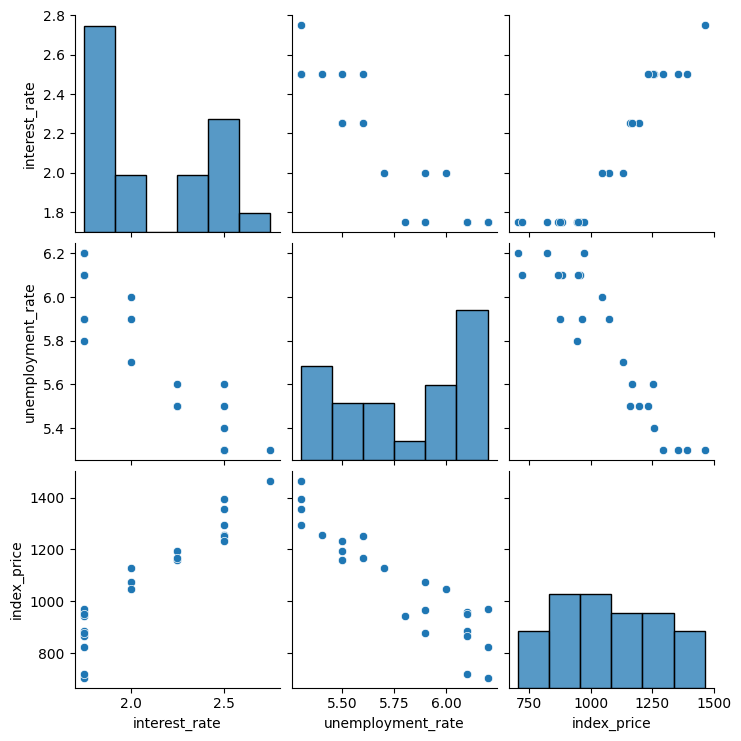

In [6]:
sns.pairplot(df)

In [7]:
corr = df.corr()
corr

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

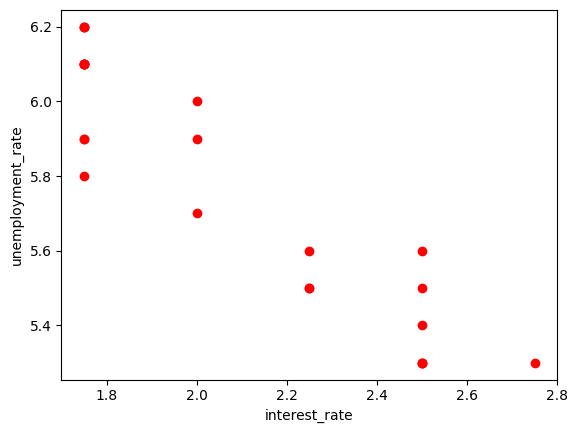

In [8]:
plt.scatter(df['interest_rate'],df['unemployment_rate'], color='r')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [17]:
df.iloc[0:2,0:-1]
# in firat "0:2" -> represents rows to display
#in second 0:-1 -> represents columns to display

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3


In [10]:
X = df.iloc[:,:-1]
y= df.iloc[:,-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [11]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

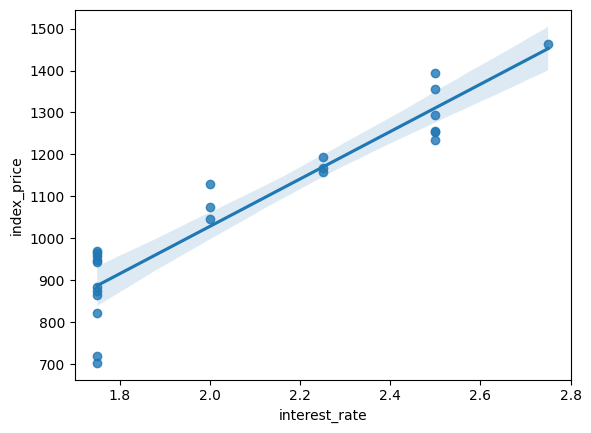

In [21]:
sns.regplot(x=df['interest_rate'],y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

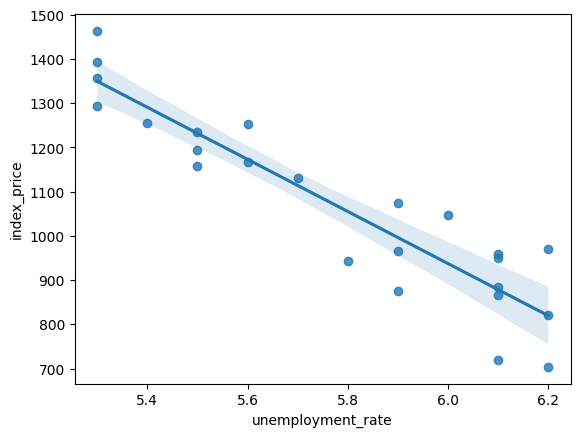

In [22]:
sns.regplot(x=df['unemployment_rate'],y=df['index_price'])

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [25]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
#cv is it split the data into number of parts it given. ex first it takes 1st part of data as test and remaining as train, next time it take 2nd part of data as test and remaining train, like that it split the test and train the number of times it is given and provide the score for each
validation_score= cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error', cv=3)
print(validation_score)
print(np.mean(validation_score))

[-4921.61331265 -7686.87497294 -5135.9962549 ]
-5914.828180162389


In [28]:
y_pred = regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mrse=np.sqrt(mse)
print(mse,mae,mrse)

8108.567426306604 73.80444932337097 90.04758423359621


In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)
#absolute score
print(1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

0.7591371539010257
0.5985619231683761


Assumptions based on regression, if these below metrics are good we assume the model is performing well

Assumptions and residual Analysis

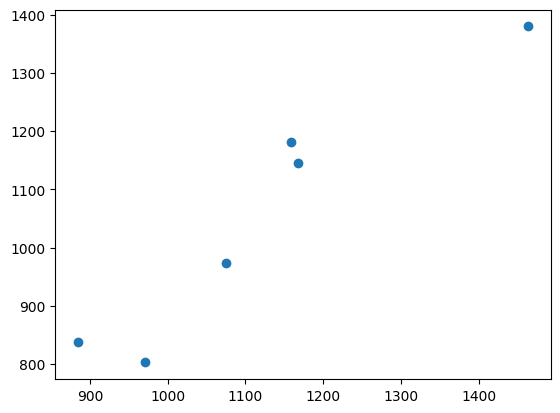

In [34]:
plt.scatter(y_test,y_pred)

The scatter looks more of a linear relationship so its good

In [35]:
residulas = y_test-y_pred
residulas

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

C:\Users\MHarikrishna\AppData\Local\Temp\ipykernel_174036\3361216063.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residulas,kde=True)


<Axes: xlabel='index_price', ylabel='Density'>

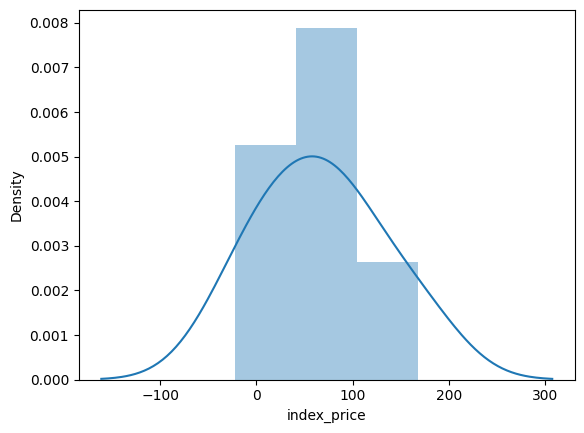

In [38]:
sns.distplot(residulas,kde=True)

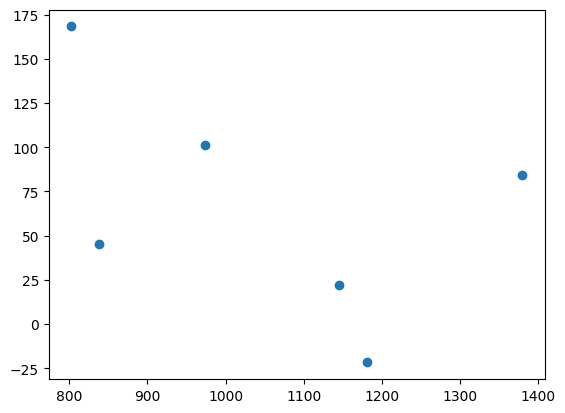

In [40]:
plt.scatter(y_pred,residulas)

In [45]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
model=sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     69.88
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           2.50e-08
Time:                        10:23:57   Log-Likelihood:                -100.85
No. Observations:                  18   AIC:                             207.7
Df Residuals:                      15   BIC:                             210.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1053.4444     16.941     62.183      0.0

C:\Users\MHarikrishna\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [44]:
print(regression.coef_,regression.intercept_)

[  88.27275507 -116.25716066] 1053.4444444444443
